<a href="https://colab.research.google.com/github/davidlealo/sic_ai_2025_sept/blob/main/3_machine_learning/clase_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# AgglomerativeClustering en sklearn

``` python
from sklearn.cluster import AgglomerativeClustering
```

El **clustering aglomerativo** es un algoritmo de **clustering
jerárquico**.\
La idea principal es ir agrupando datos paso a paso, comenzando con cada
punto como un clúster individual y luego fusionándolos progresivamente
hasta formar un número deseado de clústeres.

Este método se llama **aglomerativo** porque construye los clústeres
desde abajo hacia arriba (*bottom-up*). El proceso termina cuando se
alcanza el número de clústeres especificado o cuando no se pueden unir
más grupos.

------------------------------------------------------------------------

## Parámetros principales

Cuando inicializamos la clase:

``` python
AgglomerativeClustering(
    n_clusters=2,
    *,
    affinity='euclidean',
    metric=None,
    memory=None,
    connectivity=None,
    compute_full_tree='auto',
    linkage='ward',
    distance_threshold=None
)
```

### 1. `n_clusters`

-   Tipo: `int` (por defecto `2`).
-   Indica el número de clústeres finales.
-   Importante: si se usa `distance_threshold`, este parámetro debe
    ponerse en `None`.

### 2. `affinity` (en versiones recientes se reemplazó por `metric`)

-   Define la medida de distancia entre puntos.
-   Valores posibles:
    -   `'euclidean'` → distancia euclídea (por defecto con
        `linkage='ward'`).
    -   `'l1'`, `'l2'`, `'manhattan'`, `'cosine'`, `'precomputed'`.
-   Nota: si usas `linkage='ward'`, solo puedes usar euclidean.

### 3. `metric`

-   Nuevo nombre para `affinity` (se recomienda usarlo en lugar de
    `affinity`).
-   Permite mayor compatibilidad con métricas de `scipy`.

### 4. `linkage`

-   Define la forma en que se calculan las distancias entre clústeres:
    -   `'ward'` → minimiza la varianza dentro de los clústeres.
    -   `'complete'` → usa la distancia máxima entre puntos de dos
        clústeres.
    -   `'average'` → usa la distancia promedio entre puntos de dos
        clústeres.
    -   `'single'` → usa la distancia mínima (puede generar clústeres
        "alargados").

### 5. `distance_threshold`

-   Tipo: `float`, opcional.
-   Define el umbral de distancia a partir del cual se detiene la fusión
    de clústeres.
-   Si lo usas, `n_clusters` debe ser `None`.

### 6. `connectivity`

-   Tipo: matriz de conectividad (sparse matrix).
-   Permite restringir qué puntos pueden ser agrupados (por ejemplo, si
    hay relaciones de vecindad en datos espaciales).
-   Útil en clustering de grafos o datos espaciales.

### 7. `compute_full_tree`

-   Controla si se calcula el árbol de jerarquía completo.
-   Valores:
    -   `'auto'` (default) → depende de `n_clusters` y
        `distance_threshold`.
    -   `True` → siempre calcula todo el dendrograma.
    -   `False` → optimiza y no calcula todo el árbol.

### 8. `memory`

-   Sirve para cachear cálculos intermedios en disco o memoria RAM.
-   Puede ser útil en datasets grandes.

------------------------------------------------------------------------

## Atributos principales después de entrenar

Una vez entrenado con `.fit(X)`:

-   `labels_` → etiquetas de clúster asignadas a cada punto.
-   `n_clusters_` → número de clústeres encontrados.
-   `n_leaves_` → número de hojas en el árbol jerárquico.
-   `n_connected_components_` → cantidad de componentes conexas.
-   `children_` → lista de fusiones de clústeres en cada paso.

------------------------------------------------------------------------

## Ejemplo práctico

``` python
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Dataset de ejemplo
X, y = make_blobs(n_samples=200, centers=4, cluster_std=1.0, random_state=42)

# Modelo
model = AgglomerativeClustering(n_clusters=4, linkage='ward')

# Entrenamiento
labels = model.fit_predict(X)

# Visualización
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='rainbow')
plt.title("Clustering Aglomerativo")
plt.show()
```

En este ejemplo: - Se generan 200 puntos distribuidos en 4 clústeres. -
Se entrena con `AgglomerativeClustering`. - El gráfico muestra los
puntos coloreados según su clúster.

------------------------------------------------------------------------

## Ventajas

-   No requiere especificar centroides iniciales (como K-Means).\
-   Puede capturar clústeres de formas no esféricas.\
-   Permite análisis jerárquico y dendrogramas.

## Desventajas

-   Escala mal con grandes cantidades de datos (complejidad O(n³)).\
-   Sensible a ruido y outliers.\
-   Difícil elegir el número óptimo de clústeres.


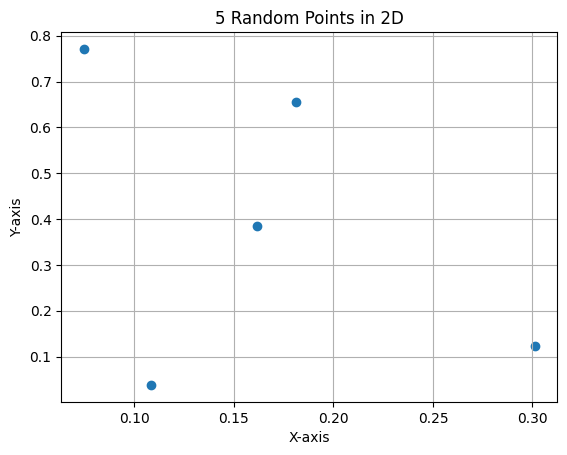

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate 5 random points
x = np.random.rand(5)
y = np.random.rand(5)

# Plot the points
plt.scatter(x, y)
plt.title('5 Random Points in 2D')
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.grid(True)
plt.show()

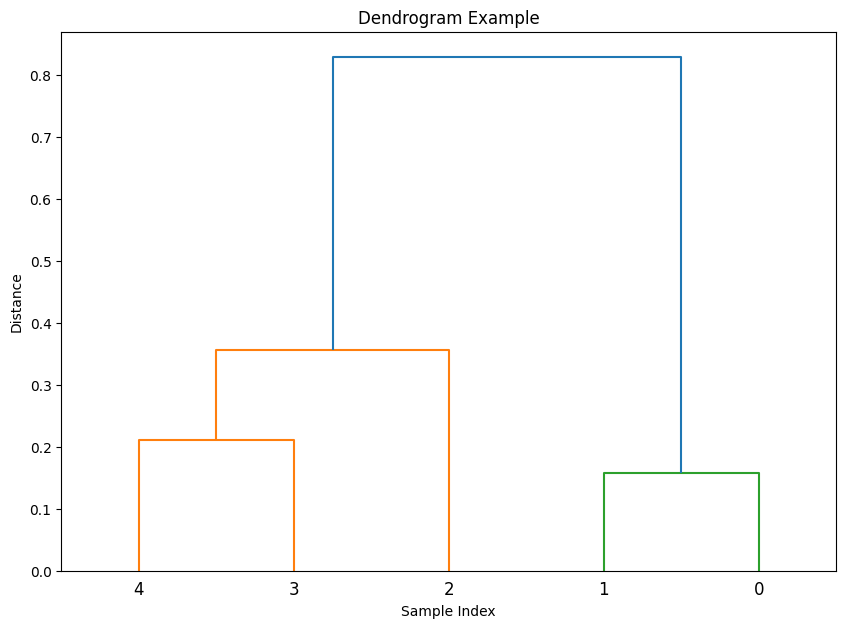

In [2]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs

# Combine the x and y coordinates into a single array
data = np.array([x, y]).T

# Perform hierarchical clustering
linked = linkage(data, 'ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram Example')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

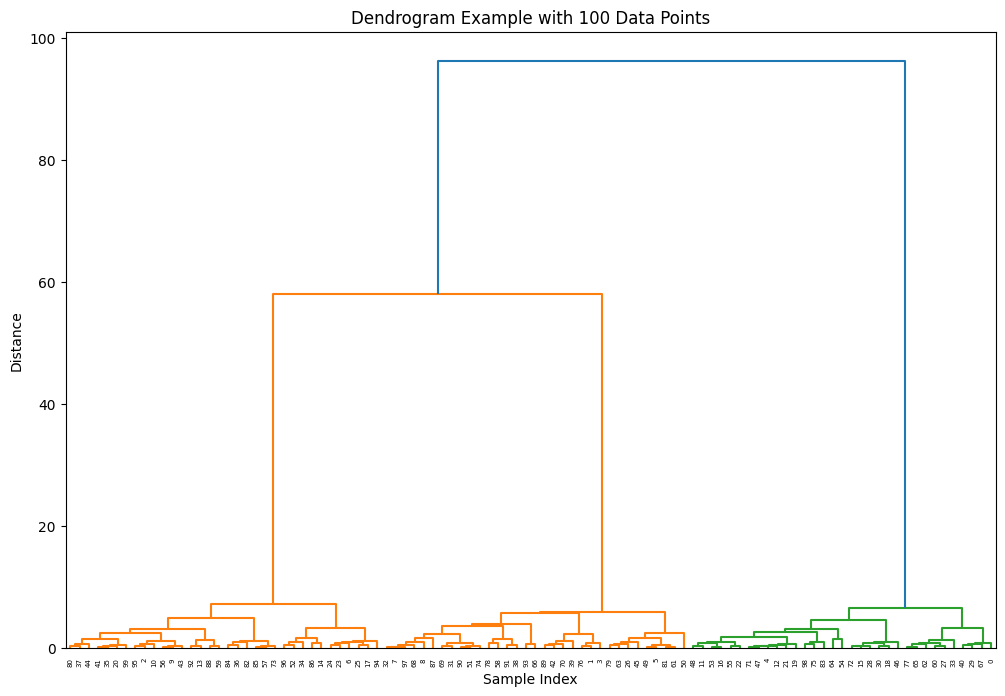

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

# Generate 100 random points
X, y = make_blobs(n_samples=100, centers=3, random_state=42)

# Perform hierarchical clustering
linked = linkage(X, 'ward')

# Plot the dendrogram
plt.figure(figsize=(12, 8))
dendrogram(linked,
            orientation='top',
            distance_sort='descending',
            show_leaf_counts=True)
plt.title('Dendrogram Example with 100 Data Points')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [5]:
from sklearn.datasets import make_blobs, make_moons
import matplotlib.pyplot as plt

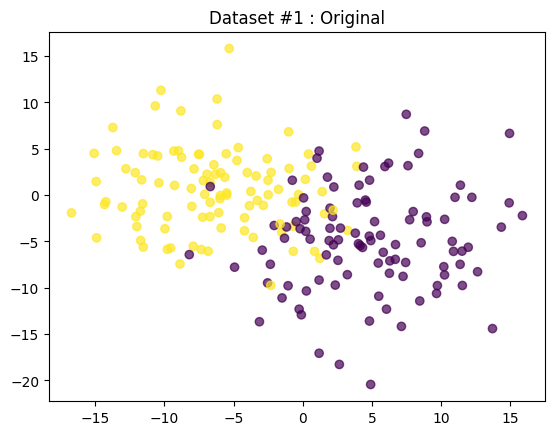

In [6]:
X1, label1 = make_blobs(n_samples=200, n_features=2, centers=2, cluster_std=5, random_state=123)
plt.scatter(X1[:,0], X1[:,1], c=label1, alpha=0.7)
plt.title('Dataset #1 : Original')
plt.show()

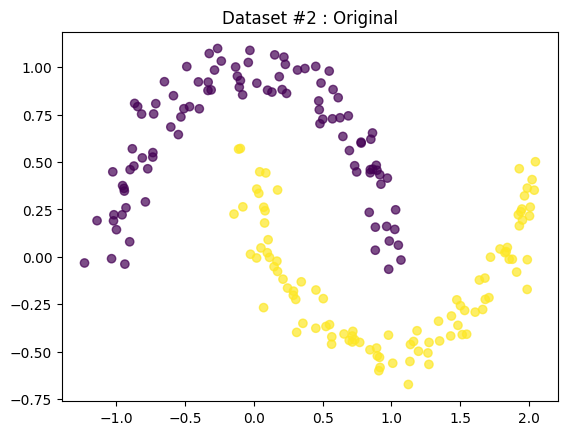

In [7]:
X2, label2 = make_moons(n_samples=200, noise=0.08, random_state=123)
plt.scatter(X2[:,0], X2[:,1], c=label2, alpha=0.7)
plt.title('Dataset #2 : Original')
plt.show()

In [8]:
from sklearn.cluster import AgglomerativeClustering


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
X1

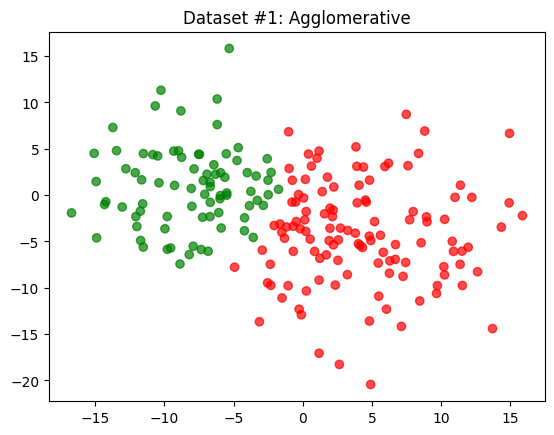

In [13]:
agglo = AgglomerativeClustering(n_clusters=2)
agglo.fit(X1)
myColors={0:'red', 1:'green'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Agglomerative')
plt.show()

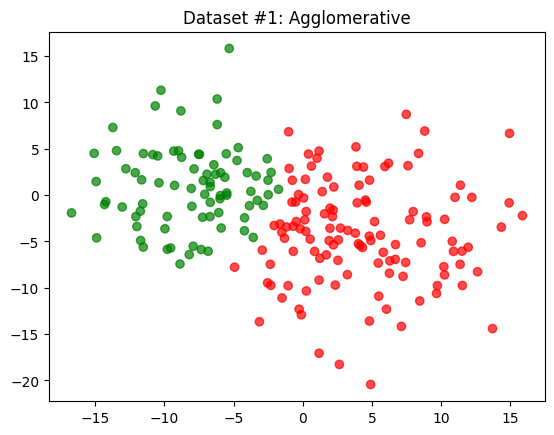

In [14]:
agglo2 = AgglomerativeClustering(n_clusters=2, linkage="complete")
agglo2.fit(X1)
myColors={0:'red', 1:'green'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Agglomerative')
plt.show()

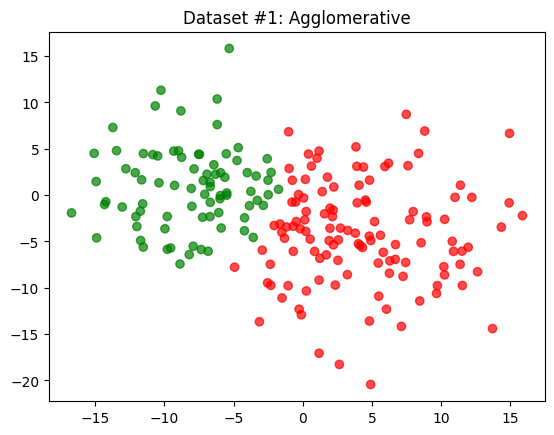

In [15]:
agglo3 = AgglomerativeClustering(n_clusters=2, linkage="average")
agglo3.fit(X1)
myColors={0:'red', 1:'green'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Agglomerative')
plt.show()

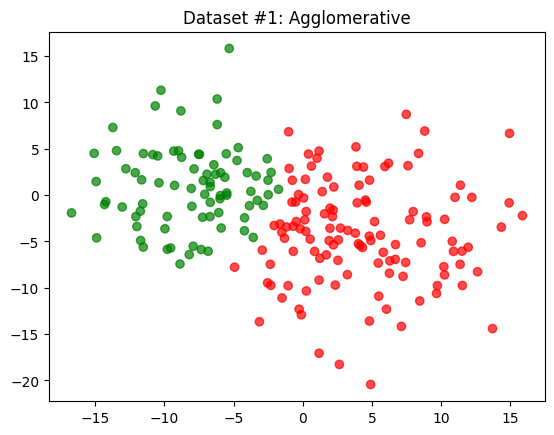

In [16]:
agglo4 = AgglomerativeClustering(n_clusters=2, linkage="single")
agglo4.fit(X1)
myColors={0:'red', 1:'green'}
plt.scatter(X1[:,0], X1[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #1: Agglomerative')
plt.show()

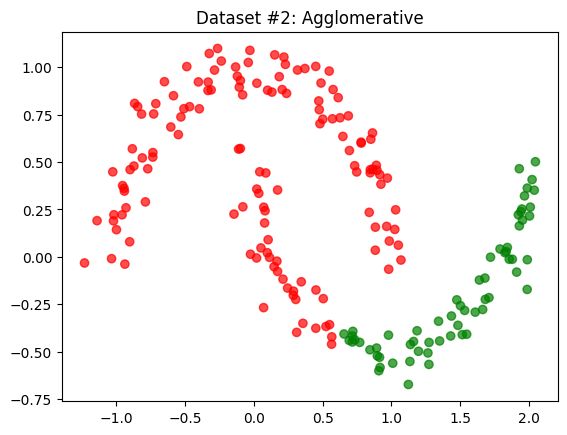

In [17]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="ward")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

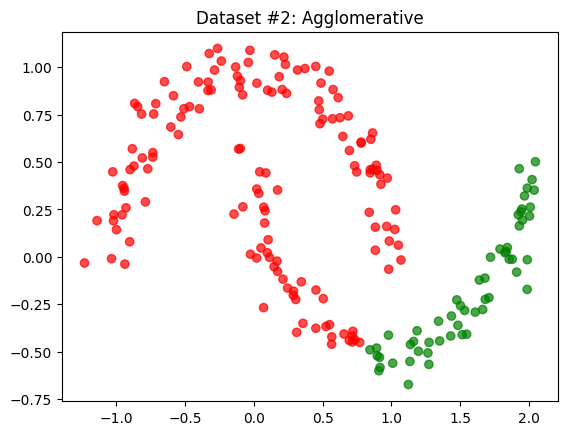

In [18]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="complete")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

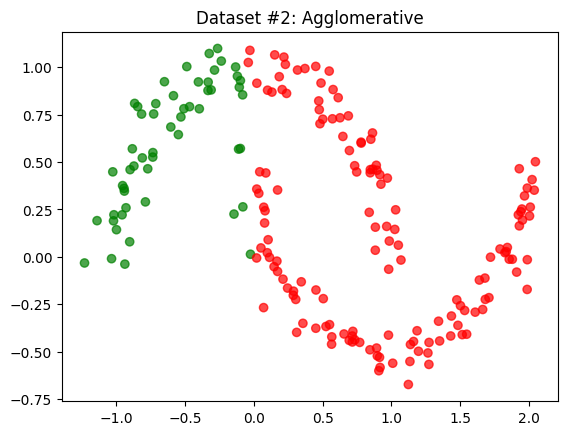

In [21]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="complete", metric="cosine")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

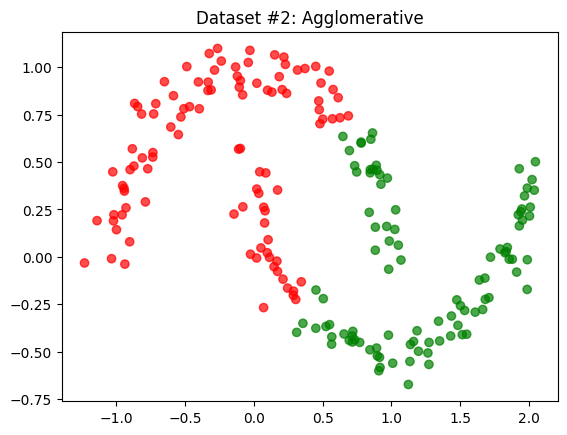

In [22]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="complete", metric="l1")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

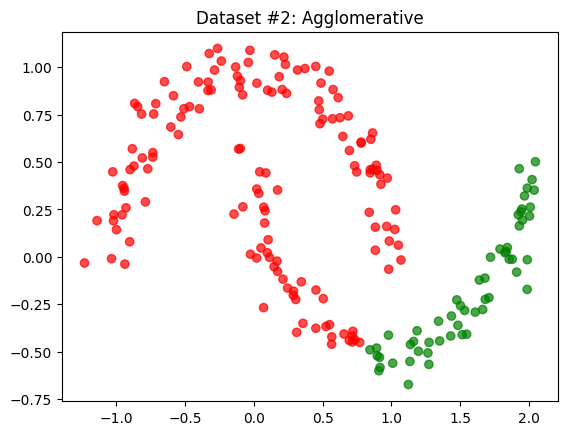

In [23]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="complete", metric="l2")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

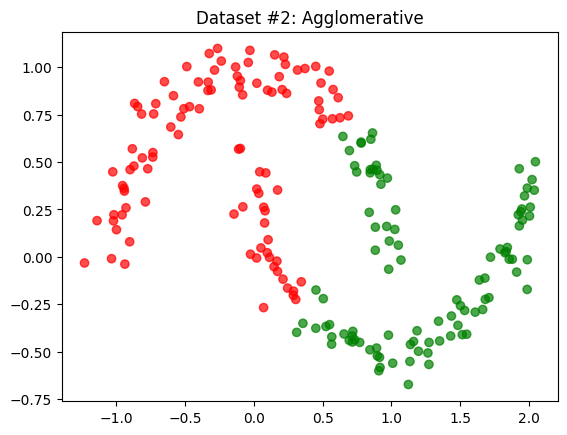

In [24]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="complete", metric="manhattan")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

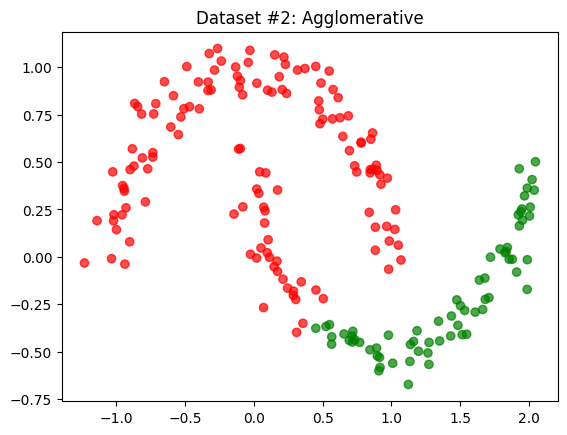

In [19]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="average")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

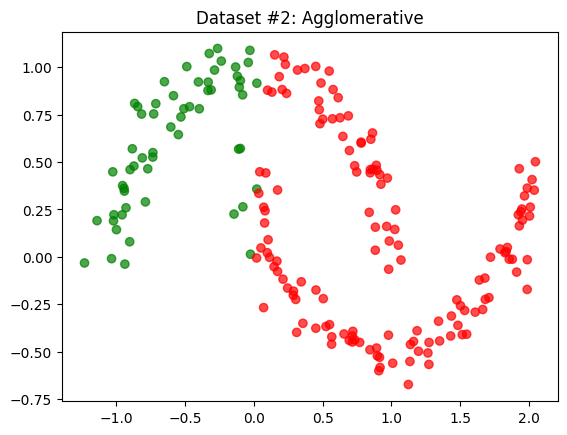

In [25]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="average", metric="cosine")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

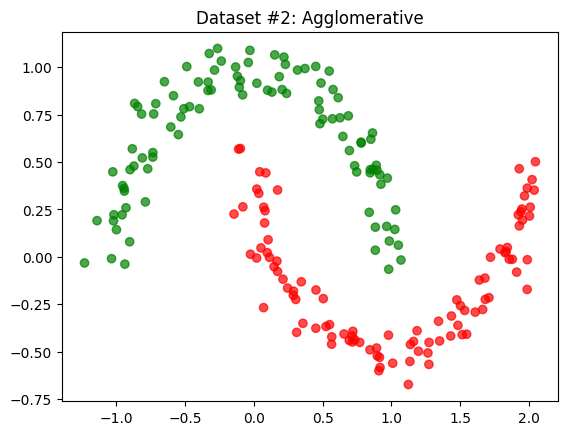

In [20]:
agglo = AgglomerativeClustering(n_clusters=2, linkage="single")
agglo.fit(X2)
myColors={0:'red', 1:'green'}
plt.scatter(X2[:,0], X2[:,1], c=pd.Series(agglo.labels_).apply(lambda x: myColors[x]), alpha=0.7)
plt.title('Dataset #2: Agglomerative')
plt.show()

# Clustering jerárquico con `scipy.cluster.hierarchy`

En `scipy.cluster.hierarchy` existen funciones muy utilizadas para
realizar **clustering jerárquico aglomerativo** y visualizarlo mediante
**dendrogramas**.\
Las tres funciones principales son:

``` python
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
```

------------------------------------------------------------------------

## 1. `linkage`

``` python
scipy.cluster.hierarchy.linkage(y, method='single', metric='euclidean', optimal_ordering=False)
```

Construye la **matriz de enlace** (linkage matrix), que contiene la
información de cómo se fusionan los clústeres en el proceso jerárquico.

### Parámetros principales:

-   `y`: array de datos de forma `(n_samples, n_features)`, o una matriz
    de distancias condensada.
-   `method`: define cómo calcular la distancia entre clústeres.
    -   `'single'`: distancia mínima entre puntos de dos clústeres.
    -   `'complete'`: distancia máxima entre puntos de dos clústeres.
    -   `'average'`: promedio de distancias entre todos los puntos.
    -   `'ward'`: minimiza la varianza dentro de los clústeres.
-   `metric`: métrica de distancia (si `y` es un conjunto de datos y no
    una matriz de distancias).
    -   `'euclidean'`, `'cityblock'`, `'cosine'`, `'hamming'`, etc.
-   `optimal_ordering`: si es `True`, reordena los clústeres para
    mejorar la legibilidad del dendrograma.

### Salida:

-   Una **matriz de enlace** de forma `(n_samples-1, 4)`:
    -   Columnas:
        1.  Índice del primer clúster fusionado.
        2.  Índice del segundo clúster fusionado.
        3.  Distancia entre los dos clústeres.
        4.  Número de muestras en el nuevo clúster formado.

------------------------------------------------------------------------

## 2. `dendrogram`

``` python
scipy.cluster.hierarchy.dendrogram(Z, p=30, truncate_mode=None, color_threshold=None, ...)
```

Dibuja el **dendrograma** a partir de la matriz de enlace `Z` generada
por `linkage`.

### Parámetros principales:

-   `Z`: la matriz de enlace calculada con `linkage`.
-   `p`: número de hojas a mostrar (si se usa truncamiento).
-   `truncate_mode`: controla la profundidad de visualización:
    -   `None`: muestra el árbol completo.
    -   `'lastp'`: solo muestra los últimos `p` clústeres.
    -   `'level'`: muestra solo hasta un nivel determinado.
-   `color_threshold`: umbral de distancia para colorear las ramas.

### Salida:

-   Un diccionario con información del dendrograma (`icoord`, `dcoord`,
    `ivl`, etc.\`).
-   También genera un gráfico si se usa con `matplotlib`.

------------------------------------------------------------------------

## 3. `fcluster`

``` python
scipy.cluster.hierarchy.fcluster(Z, t, criterion='inconsistent')
```

Asigna cada observación a un clúster a partir de la matriz de enlace
`Z`.

### Parámetros principales:

-   `Z`: la matriz de enlace calculada con `linkage`.
-   `t`: umbral de corte para definir los clústeres.
-   `criterion`: regla para formar los clústeres:
    -   `'inconsistent'`: usa medidas de inconsistencia.
    -   `'distance'`: corta el dendrograma a una altura `t`.
    -   `'maxclust'`: forma un número máximo de clústeres `t`.

### Salida:

-   Un array de etiquetas de clúster para cada observación.

------------------------------------------------------------------------

## Ejemplo práctico

``` python
import numpy as np
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# Datos de ejemplo
X = np.array([[1, 2], [1.5, 1.8], [5, 8],
              [8, 8], [1, 0.6], [9, 11]])

# Calcular matriz de enlace con método 'ward'
Z = linkage(X, method='ward')

# Graficar dendrograma
plt.figure(figsize=(8, 4))
dendrogram(Z, color_threshold=7)
plt.title("Dendrograma - Clustering Jerárquico")
plt.show()

# Formar clústeres cortando el dendrograma en altura 7
clusters = fcluster(Z, t=7, criterion='distance')
print("Etiquetas de clúster:", clusters)
```

En este ejemplo: - Se construye la matriz de enlace con `linkage` usando
método `ward`. - Se visualiza el dendrograma con `dendrogram`. - Se
forman clústeres cortando el árbol a una altura de 7 con `fcluster`.

------------------------------------------------------------------------

## Ventajas

-   Permite visualizar jerarquía completa mediante dendrogramas.
-   No requiere fijar el número de clústeres de antemano.
-   Flexible con distintos métodos de enlace y métricas de distancia.

## Desventajas

-   Complejidad computacional alta en datasets grandes.
-   Sensible al ruido y outliers.
-   Elegir el umbral de corte o el número de clústeres no siempre es
    trivial.


In [26]:
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

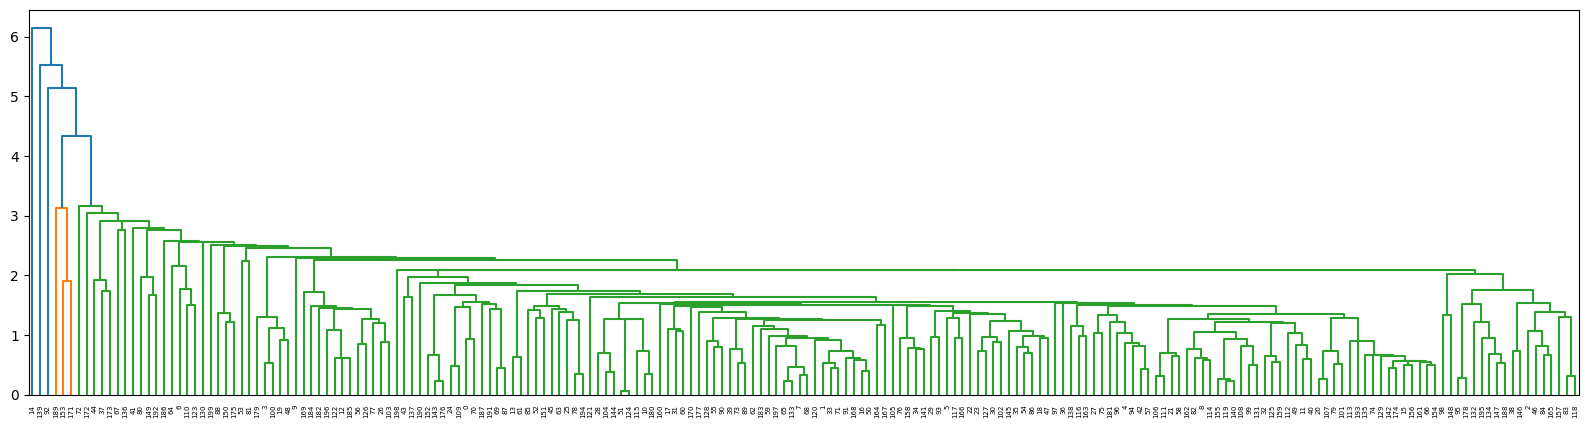

In [29]:
myLinkage = linkage(X1, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [30]:
labels = fcluster(myLinkage, 5, criterion='distance')
pd.Series(labels).value_counts()

,count
1,197
4,1
2,1
3,1


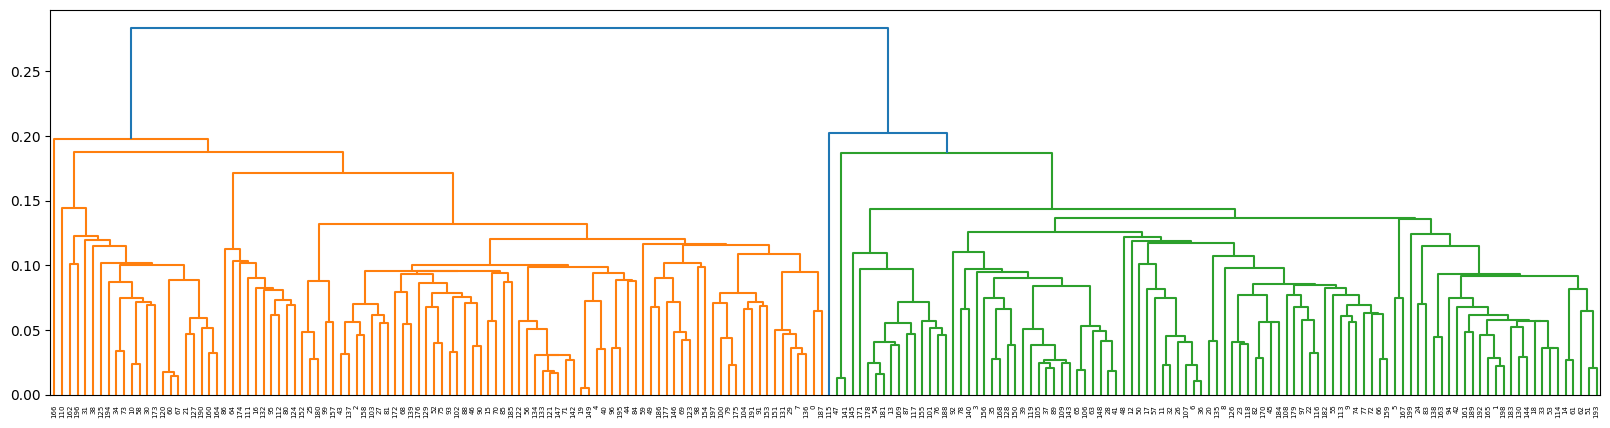

In [31]:
myLinkage = linkage(X2, method='single')
plt.figure(figsize=(20,5))
dendrogram(myLinkage)
plt.show()

In [32]:
labels = fcluster(myLinkage, 0.23, criterion='distance')
pd.Series(labels).value_counts()

,count
1,100
2,100
